# Classificação com Árvores de Decisão no Scikit-Learn
- Este notebook faz parte da atividades teóricas do clube de Inteligência Artificial da Escola Sesc de Ensino Médio;
- Nesta atividade iremos aprender mais sobre algoritmos de Classificação utilizando árvores de Decisão em uma biblioteca muito utilizada para Machine Learning, a Scikit-Learn.

## Scikit-Learn
- A scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.

https://scikit-learn.org/

## 1. Preparando os dados

### 1.1 Importando as bibliotecas principais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**NumPy** é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas. *Wikipédia*

**Pandas** é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais. É software livre sob a licensa licença BSD. *Wikipédia*

**Matplotlib** é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para a da linguagem de programação Python e sua extensão de matemática NumPy. Originalmente criada pelo biólogo e neurocientista americano John D. *Wikipédia*

### 1.2 Importando  e visualizando o Dataset
**Dataset** é uma coleção de dados (conjunto de dados) normalmente tabulados. Por cada elemento se indicam várias características. Cada coluna representa uma variável particular. Cada linha corresponde a um determinado membro do conjunto de dados em questão. Cada valor é conhecido como um dado.

#### Sobre o Dataset deste projeto

**Diagnóstico de COVID-19 e seu espectro clínico**: https://www.kaggle.com/einsteindata4u/covid19

Este conjunto de dados contém dados anônimos de pacientes atendidos no Hospital Israelita Albert Einstein, em São Paulo, Brasil, e que tiveram amostras coletadas para a realização do SARS-CoV-2 RT-PCR e exames laboratoriais adicionais durante uma visita ao hospital.

Todos os dados foram tornados anônimos seguindo as melhores práticas e recomendações internacionais. Todos os dados clínicos foram padronizados para ter uma média de zero e um desvio padrão da unidade.

**Objetivo:** Com base nos resultados dos testes laboratoriais comumente coletados para um caso suspeito de COVID-19 durante uma visita ao pronto-socorro, o modelo deverá prever a classificação do resultado do teste para SARS-Cov-2 como positivo ou negativo.

**Link para o arquivo .csv do Dataset:** https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv

#### Lendo o arquivo que contém os nossos dados e criando um Dataframe com o Pandas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv', sep=";")

#### Mostrando as 5 primeiras linhas do Dataframe

In [3]:
df.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


#### Mostrando as 5 últimas linhas do Dataframe

In [4]:
df.tail(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.541564,-1.288428,-1.140144,-0.50357,-0.735872


#### Exibindo informações importantes do Dataframe

In [5]:
df.describe().round(2) # Resume e descreve algumas operações gerais do Dataset. Round(2) arredonda para 2 casas decimais.

,Patient age quantile,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
count,5644.00,5644.00,5644.00,5644.00,603.00,602.00,602.00,506.00,424.00
mean,9.32,0.01,0.01,0.01,-0.00,0.00,-0.00,0.00,-0.00
std,5.78,0.12,0.09,0.08,1.00,1.00,1.00,1.00,1.00
min,0.00,0.00,0.00,0.00,-4.35,-2.02,-1.14,-0.54,-2.39
25%,4.00,0.00,0.00,0.00,-0.59,-0.64,-0.53,-0.51,-0.63
50%,9.00,0.00,0.00,0.00,0.04,-0.21,-0.22,-0.39,-0.08
75%,14.00,0.00,0.00,0.00,0.73,0.45,0.39,0.03,0.51
max,19.00,1.00,1.00,1.00,2.67,4.52,11.08,8.03,5.05


In [6]:
print(f'Tamanho do Dataframe: {df.shape[0]} linhas e {df.shape[1]} colunas') # Descreve o tamanho do dataframe em uma tupla

Tamanho do Dataframe: 5644 linhas e 11 colunas


In [7]:
df.info() # Descreve informaçoes de tamanho e de tipo das características

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes. 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes. 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes. 0=no)  5644 non-null   int64  
 6   Hemoglobin                                             603 non-null    float64
 7   Leukocytes                                             602 non-null    float64
 8   Basophils                                       

#### Removendo os valores em branco (NaN)
Removemos esses valores para evitar ruídos e distorções em nosso modelo

In [8]:
print(f'Dataset com valores em branco: {df.shape[0]}')
print(f'Dataset sem valores em branco: {df.dropna().shape[0]}')

Dataset com valores em branco: 5644
Dataset sem valores em branco: 357


In [9]:
df = df.dropna()

#### O nosso dataset está balanceado ou desbalanecado?

In [10]:
print ('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])

Total de registros negativos:  302
Total de registros positivos:  55


### 1.3 Selecionando as características principais para o estudo

**Qual coluna utilizaremos para realizar nosso experimento?**
Quais serão variáveis independentes?
Qual será a variável dependente?

In [11]:
df.head(2)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.09461,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.36455,-0.223767,-0.286986,-1.838623


#### Selecionando as etiquetas (y)

In [12]:
y = df['SARS-Cov-2 exam result'].values 
y[:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

#### Selecionando as características (X)

In [13]:
X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values
X[:5]

array([[-0.02234027, -0.09461035, -0.22376651, -0.14789495],
       [-0.774212  ,  0.36455047, -0.22376651, -0.28698576],
       [ 0.85484386, -0.07513076,  2.52536511, -0.4340246 ],
       [ 0.85484386,  0.10575075, -0.52922559, -0.52940118],
       [-0.71155578, -0.28662303, -0.22376651,  0.54557222]])

### 1.4 Criando os datasets de treino e de teste
Usando Sklearn para escalar os dados.
#### Importando o train_test_split da biblioteca scikit-learn
A função train_test_split nos ajuda a dividir o dataset em treino e teste com base nos parâmetros definidos

In [14]:
from sklearn.model_selection import train_test_split

#### Utilizando a função train_test_split e inserindo os dados nas variáveis indicadas
O test_size representa a proporção do dataset que será incluída na divisão de teste. Os valores pode ir de 0.0 a 1.0.

O random_state garante que as divisões geradas sejam reproduzíveis. O Scikit-learn usa permutações aleatórias para gerar as divisões. O estado aleatório que você fornece é usado como uma semente (random seed) para o gerador de números aleatórios. Isso garante que os números aleatórios sejam gerados na mesma ordem.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Escolher um modelo

<img src="https://scikit-learn.org/stable/_static/ml_map.png"/>

### 2.1 Árvores de Decisão
Árvores de decisão (DTs) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_0021.png"/>

Fontes: 
- https://scikit-learn.org/stable/modules/tree.htmls

#### Importando o algoritmo DecisionTreeClassifier de classificação da biblioteca scikit-learn

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

## 3. Ajustar os dados ao modelo e fazer a classificação

### 3.1 Instanciar a classe DecisionTreeClassifier()

<img src="http://jcsites.juniata.edu/faculty/rhodes/ida/images/weatherdectree.GIF">

In [17]:
modelo = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
modelo.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### 3.2 Utilizando o método .fit()
O método .fit() do objeto modelo criado da classe DecisionTreeClassifier() treinará o nosso modelo e possibilitará a classificação.

In [19]:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### 3.3 Exibindo as principais características e imprimindo a árvore de decisão

[0.21080526 0.42553034 0.11397228 0.24969212]


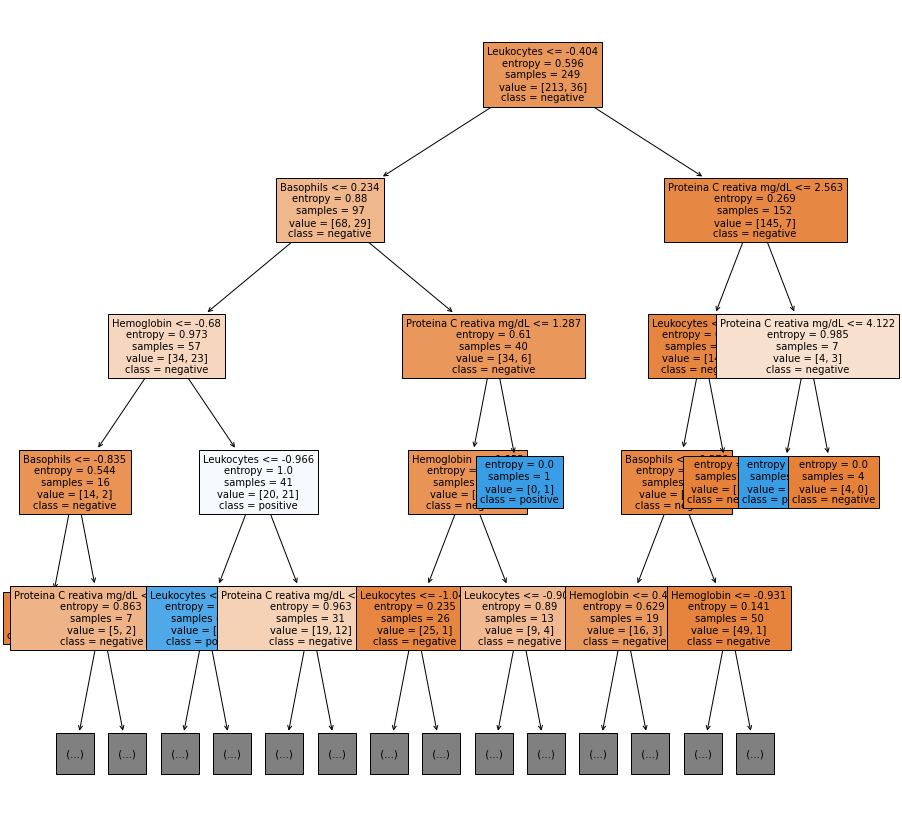

In [20]:
import graphviz
print (modelo.feature_importances_)
nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(modelo,
               feature_names=nome_features,
               class_names=nome_classes,
               filled=True,
               max_depth=4,
               fontsize=10)
plt.show()

In [31]:
r = export_text(modelo, feature_names=nome_features)
print(r)

|--- Leukocytes <= -0.40
|   |--- Basophils <= 0.23
|   |   |--- Hemoglobin <= -0.68
|   |   |   |--- Basophils <= -0.83
|   |   |   |   |--- class: negative
|   |   |   |--- Basophils >  -0.83
|   |   |   |   |--- Proteina C reativa mg/dL <= 0.48
|   |   |   |   |   |--- class: negative
|   |   |   |   |--- Proteina C reativa mg/dL >  0.48
|   |   |   |   |   |--- class: positive
|   |   |--- Hemoglobin >  -0.68
|   |   |   |--- Leukocytes <= -0.97
|   |   |   |   |--- Leukocytes <= -1.48
|   |   |   |   |   |--- class: negative
|   |   |   |   |--- Leukocytes >  -1.48
|   |   |   |   |   |--- class: positive
|   |   |   |--- Leukocytes >  -0.97
|   |   |   |   |--- Proteina C reativa mg/dL <= -0.36
|   |   |   |   |   |--- class: negative
|   |   |   |   |--- Proteina C reativa mg/dL >  -0.36
|   |   |   |   |   |--- class: positive
|   |--- Basophils >  0.23
|   |   |--- Proteina C reativa mg/dL <= 1.29
|   |   |   |--- Hemoglobin <= 0.85
|   |   |   |   |--- Leukocytes <= -1.05
|  

### 3.4 Fazendo as predições no dataset de teste

In [21]:
y_preds = modelo.predict(X_test)

In [22]:
X_test[:5]

array([[-0.774212  , -0.89883721,  0.69261074, -0.52940118],
       [ 1.60671556, -0.54542261,  0.3871516 , -0.33666104],
       [-0.3356202 , -1.18824756,  0.3871516 , -0.11610276],
       [ 1.91999543, -1.13815737,  0.3871516 , -0.47177783],
       [-1.27546001, -0.26157784, -0.22376651, -0.4340246 ]])

In [23]:
y_preds[:5]

array(['negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

## 4. Avaliando o modelo


#### Quais foram as características de maior importância no modelo?

Feature ranking:
1. feature 1 (0.425530)
2. feature 3 (0.249692)
3. feature 0 (0.210805)
4. feature 2 (0.113972)


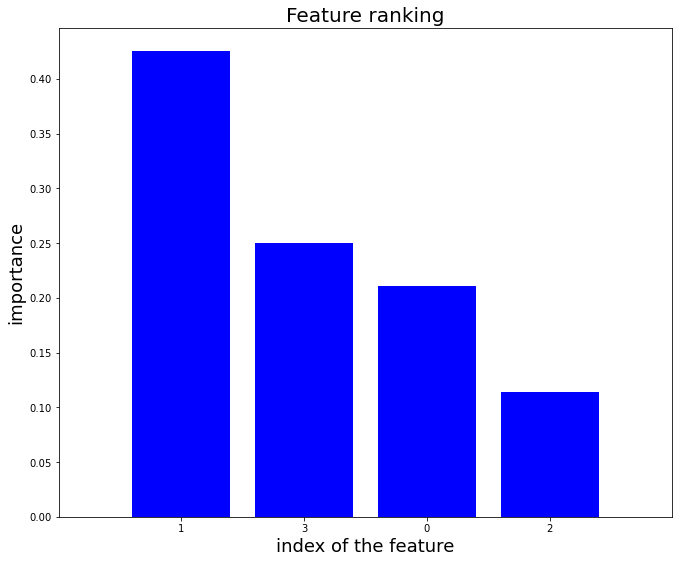

In [24]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']

In [25]:
from sklearn.metrics import accuracy_score, classification_report
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(y_test, y_preds))

ACURÁCIA DA ÁRVORE:  0.8518518518518519
